<a href="https://colab.research.google.com/github/ms7199/Airbnb-Booking-Analysis/blob/main/Airbnb_Bookings_Analysis_Capstone_Project_BY_Mayank_Gupta.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. </b>

## <b>This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values. </b>

## <b> Explore and analyze the data to discover key understandings (not limited to these) such as : 
* What can we learn about different hosts and areas?
* What can we learn from predictions? (ex: locations, prices, reviews, etc)
* Which hosts are the busiest and why?
* Is there any noticeable difference of traffic among different areas and what could be the reason for it? </b>

In [ ]:
#importing all the necessary liararies as per requirements
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew

In [ ]:
plt.style.use('seaborn-notebook')

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
airbnb_df = pd.read_csv("/content/drive/MyDrive/AlmaBetter /Team capstone project/EDA/Airbnb Bookings Analysis /Airbnb NYC 2019.csv") # loading the dataset

In [ ]:
airbnb_df.head() # print first few rows for getting overview of the dataset

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [ ]:
airbnb_df.describe() # descriptive summary of all the numeric data columns

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


## Insights of minimum nights and total availability 
---

In [ ]:
minimum_nights_gt_365 = airbnb_df[airbnb_df['minimum_nights']>365].sort_values('minimum_nights',ascending=False)
print(f"There are total {minimum_nights_gt_365.shape[0]} properties in which minimum nights stay required more then 365 nights.")

There are total 14 properties in which minimum nights stay required more then 365 nights.


In [ ]:
print(f"There are total {len(airbnb_df[airbnb_df['price']==0])} properties where price is 0.")

There are total 11 properties where price is 0.


### Observation

---

*   There are 14 properties in which minimum nights stay required more then 365 nights, which is only preferable for the customers who preferred to stay long.


*   The price for the property for staying is 0 dollar, which is logically not possible.

In [ ]:
airbnb_df.info(memory_usage='deep') # concise summary of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [ ]:
# total of null values in number and 
total_null_values = airbnb_df.isnull().sum().reset_index()
perc_null_values = (airbnb_df.isnull().mean()*100).reset_index()
dd = pd.merge(total_null_values,perc_null_values, on=['index']).rename(columns={'index':'comulmn_name', '0_x':'total_null_values_number', '0_y':'total_null_values_percentage'})
dd.sort_values(by='total_null_values_number', ascending=False)

,comulmn_name,total_null_values_number,total_null_values_percentage
12,last_review,10052,20.558339
13,reviews_per_month,10052,20.558339
3,host_name,21,0.042949
1,name,16,0.032723
0,id,0,0.000000
2,host_id,0,0.000000
4,neighbourhood_group,0,0.000000
5,neighbourhood,0,0.000000
6,latitude,0,0.000000
7,longitude,0,0.000000


In [ ]:
airbnb_df.nunique().sort_values() # we can varify that how much values have each categorical column.

room_type                             3
neighbourhood_group                   5
calculated_host_listings_count       47
minimum_nights                      109
neighbourhood                       221
availability_365                    366
number_of_reviews                   394
price                               674
reviews_per_month                   937
last_review                        1764
host_name                         11452
longitude                         14718
latitude                          19048
host_id                           37457
name                              47905
id                                48895
dtype: int64

In [ ]:
# Handling null values and delete the unnecessary columns
airbnb_df['reviews_per_month'] = airbnb_df['reviews_per_month'].fillna(0)
airbnb_df.drop(['last_review','id', 'host_id', 'host_name'], axis=1, inplace=True)

In [ ]:
# total of null values in number and percentage after missing va;ues handling
total_null_values = airbnb_df.isnull().sum().reset_index()
perc_null_values = (airbnb_df.isnull().mean()*100).reset_index()
dd = pd.merge(total_null_values,perc_null_values, on=['index']).rename(columns={'index':'comulmn_name', '0_x':'total_null_values_number', '0_y':'total_null_values_percentage'})
dd.sort_values(by='total_null_values_number', ascending=False)

,comulmn_name,total_null_values_number,total_null_values_percentage
0,name,16,0.032723
1,neighbourhood_group,0,0.000000
2,neighbourhood,0,0.000000
3,latitude,0,0.000000
4,longitude,0,0.000000
5,room_type,0,0.000000
6,price,0,0.000000
7,minimum_nights,0,0.000000
8,number_of_reviews,0,0.000000
9,reviews_per_month,0,0.000000


## Total and percentage values for each neighbourhood group
---

In [ ]:
airbnb_df['neighbourhood_group'].value_counts() # total properties has each neighbourhoog group

Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64

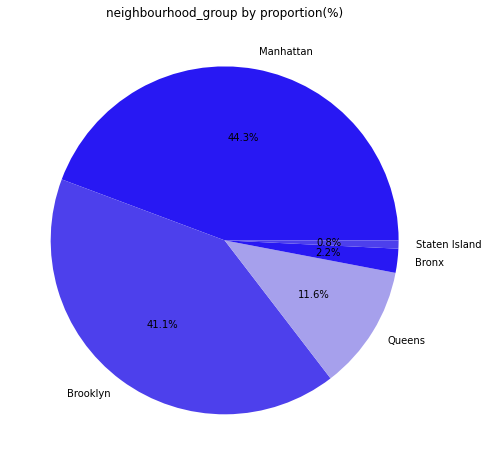

In [ ]:
# Types of rooms by proportion(%)
plt.figure(figsize=(10,8))
lables = airbnb_df["neighbourhood_group"].value_counts().index
data = airbnb_df["neighbourhood_group"].value_counts().values
plt.pie(data, labels = lables, autopct='%1.1f%%', colors = ['#2818F3','#4D40EC','#A6A0EC'])
plt.title("neighbourhood_group by proportion(%)")
plt.show()

### Observation
---

* There is a total of 5 distinct neighbourhood groups.
* Manhattan has the highest properties of 21661(44.3%) and Staten Island has the lowest, which is 373(0.8%) properties.



## Distribution of numeric columns
---

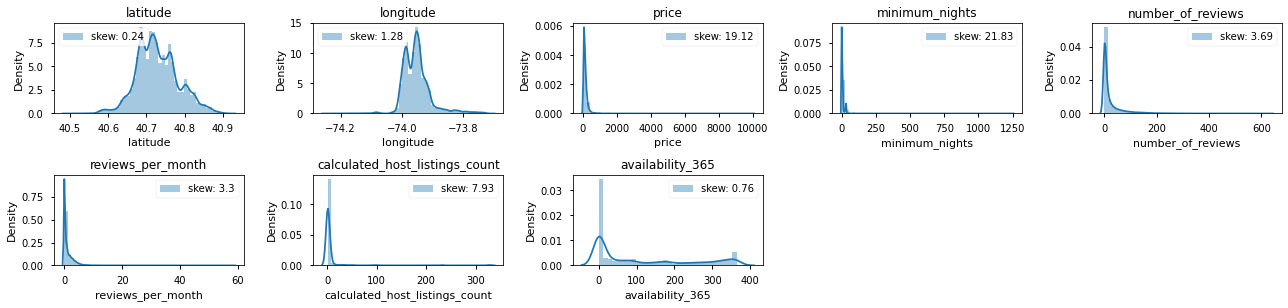

In [ ]:
plt.figure(figsize=(18,6))
for n, column in enumerate(airbnb_df.describe().columns):
  plt.subplot(3,5,n+1)
  sns.distplot(airbnb_df[column],label = "skew: "+ str(np.round(skew(airbnb_df[column]),2)))
  plt.legend()
  plt.title(f'{column}')
  plt.tight_layout()


### Observation
---

* The skewness value of almost all the columns is not too near zero, which means they are not normally distributed.

## Outlier detection
---

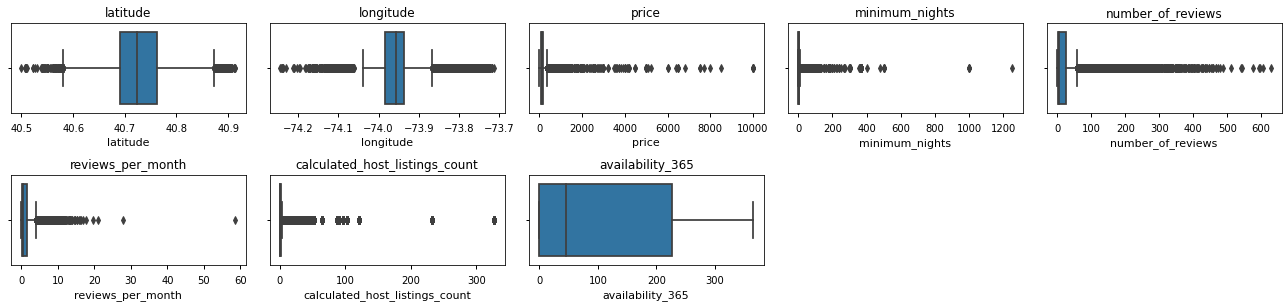

In [ ]:
plt.figure(figsize=(18,6))
for n, column in enumerate(airbnb_df.describe().columns):
  plt.subplot(3,5,n+1)
  sns.boxplot(airbnb_df[column])
  plt.title(f'{column}')
  plt.tight_layout()

### Observation
---

* Apart from the `avalability_365` column, all the columns have a lot of outliers.


## Correlation matrix
---

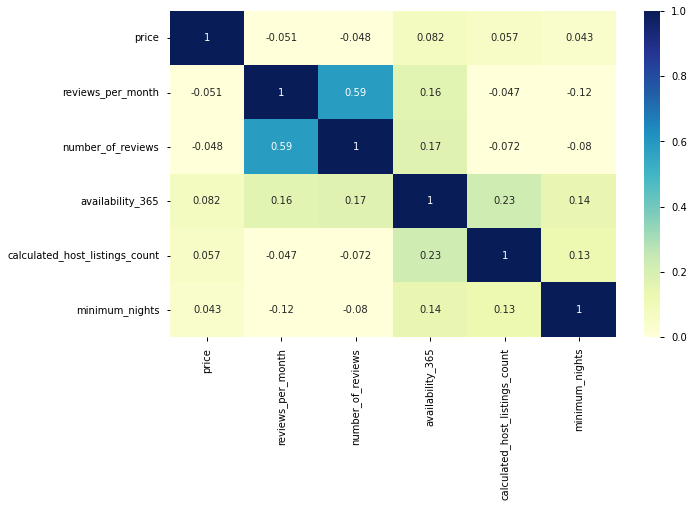

In [ ]:
columns=list(set(airbnb_df.describe().columns) - {'latitude', 'longitude', 'id', 'host_id'}) # remove unwanted columns for correlation
numeric_data_corr = airbnb_df[columns].corr()
plt.figure(figsize=(10,6))
sns.heatmap(numeric_data_corr, annot= True, cmap="YlGnBu", vmin=0)
plt.show()

### Observation
---
*   correlation between `number_of_reviews` and `reviews_per_month` is highly positive.
* Remaining all the columns do not have that much correlation between each column.



## Number of reviews by each area
---

In [ ]:
reviews_by_areas = airbnb_df.groupby(['neighbourhood_group'])['number_of_reviews'].sum().reset_index() # reviews count for each area
reviews_by_areas

,neighbourhood_group,number_of_reviews
0,Bronx,28371
1,Brooklyn,486574
2,Manhattan,454569
3,Queens,156950
4,Staten Island,11541


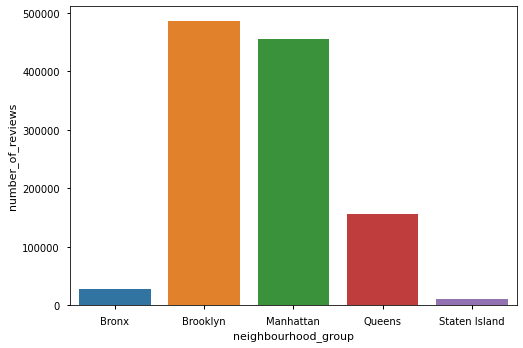

In [ ]:
sns.barplot(data=reviews_by_areas, x='neighbourhood_group', y='number_of_reviews')
plt.show()

### Observation


*   Brooklyn is the most reviewed area and on the other hand, Staten Island is the least reviewed area.
*   Review count of Brooklyn is just a few more than Manhattan.


## Mean price for every individual area with respect to room type
---

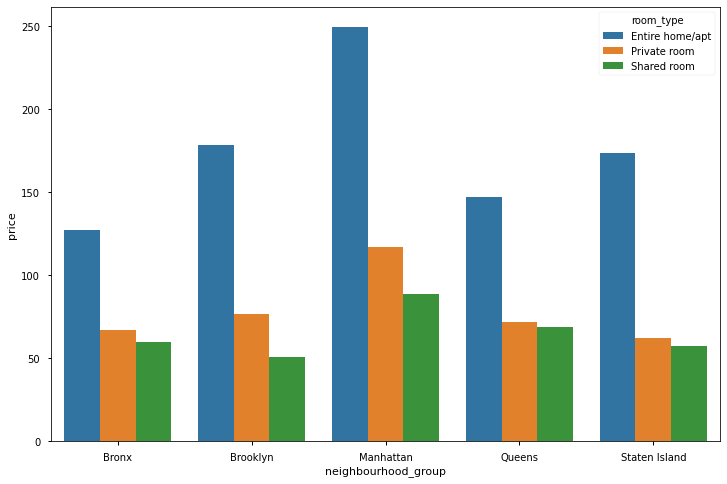

In [ ]:
# mean price for every individual area with respect to room type
mean_price_neighbourhood_group = airbnb_df.groupby(["neighbourhood_group","room_type"],as_index=False)[['price']].mean()
plt.figure(figsize=(12,8))
sns.barplot(data= mean_price_neighbourhood_group, x='neighbourhood_group', y = "price",hue = "room_type")
plt.show()

### Observation
---

*   Manhattan has the highest average room price, even Brooklyn and Staten island is almost the same in this criteria but Staten Island is on fewer lower side. 
*   Average Room price of the Entire home/apt is much more than the remaining 2 types of rooms which s predictable.
* Pattern for pricing of all the 3 types of rooms is the same for all 5 neighbourhood groups. 

 



## Price distribution with respect to areas(price<500 dollars)
---

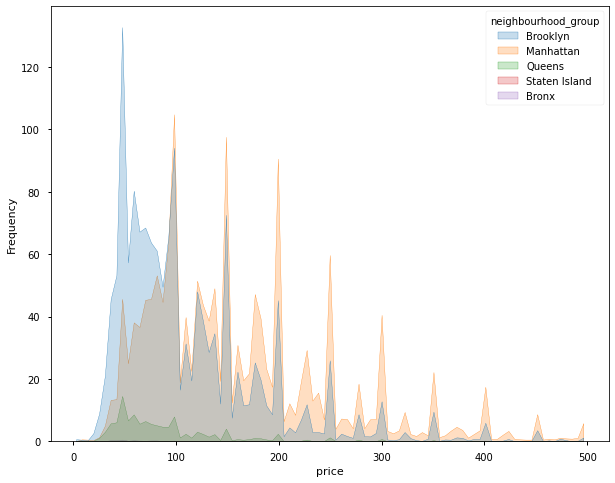

In [ ]:
# price distribution with respect to areas(price<500 dollars)
plt.figure(figsize=(10,8))
sns.histplot(data=airbnb_df[airbnb_df['price'] < 500], x ="price",hue= "neighbourhood_group",stat="frequency",element='poly') 
# took data which price were less then 500 dollars, because majority of the price is less then 500 dollars
plt.show()

### Observation
---

*   In all the 5 groups prices mostly vary from 0 to 200 dollars.



## Total and percentage values for each type of room
---

In [ ]:
airbnb_df['room_type'].value_counts() # total properties has each neighbourhoog group

Entire home/apt    25409
Private room       22326
Shared room         1160
Name: room_type, dtype: int64

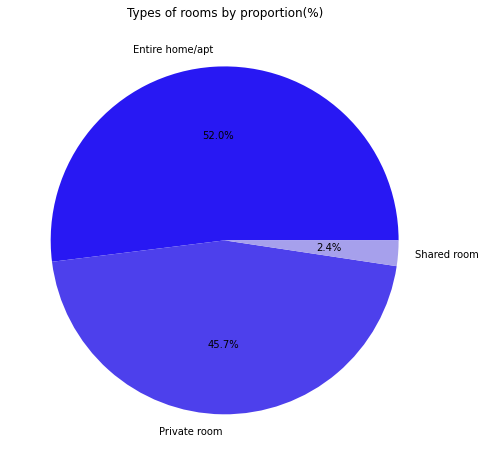

In [ ]:
# Types of rooms by proportion(%)
plt.figure(figsize=(10,8))
lables = airbnb_df["room_type"].value_counts().index
data = airbnb_df["room_type"].value_counts().values
plt.pie(data, labels = lables, autopct='%1.1f%%', colors = ['#2818F3','#4D40EC','#A6A0EC'])
plt.title("Types of rooms by proportion(%)")
plt.show()

### Observation
---

*   More than half of the rooms are Entire home/apt type.
*   shared room has only 2.4%.



## Insights with respect to location (latitude, longitude)
---

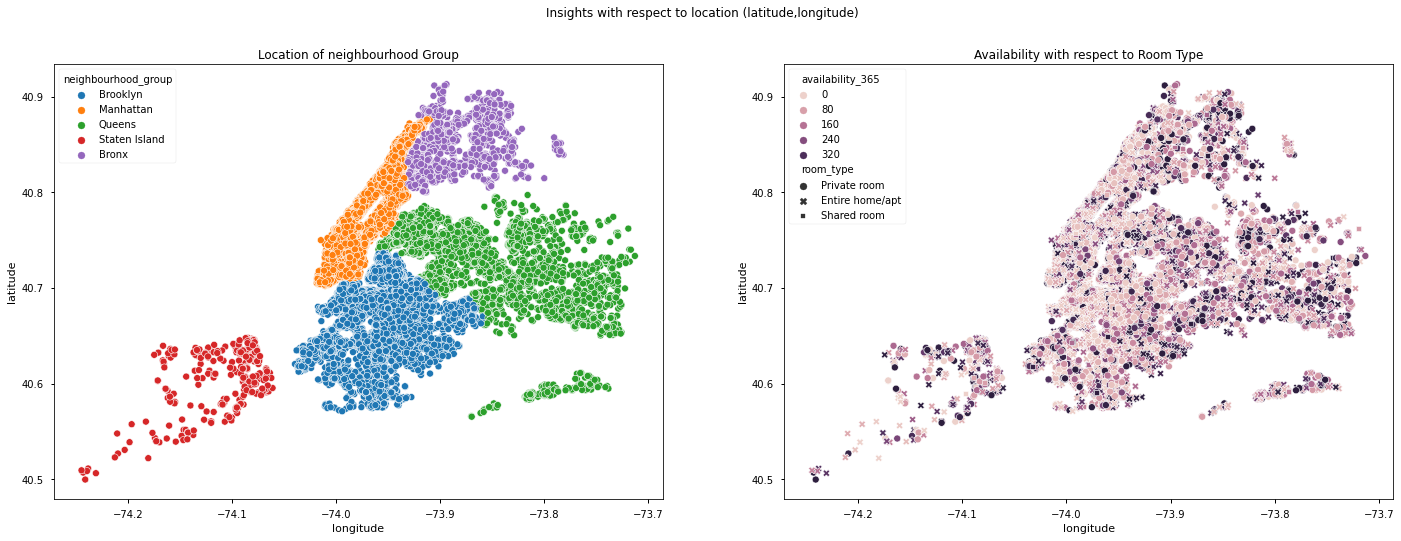

In [ ]:
# Insights with respect to location (latitude,longitude)
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(24,8))
fig.suptitle('Insights with respect to location (latitude,longitude)')

sns.scatterplot(data=airbnb_df, x = "longitude", y = "latitude",hue ="neighbourhood_group",ax=axes[0])
axes[0].set_title("Location of neighbourhood Group")

sns.scatterplot(data=airbnb_df, x = "longitude", y = "latitude",hue ="availability_365",style="room_type",ax=axes[1])
axes[1].set_title("Availability with respect to Room Type")
plt.show()

### Observation
---

*   From the first chart, a clear visualization of the neighbourhood location of New York City with respect to our given data. 
*   From the second chart, tried to visualize the availability with respect to Room Types. we can say that data is mostly equally distributed, but on the top of the central part of the is the city busiest.



# **Overall Observation/Conclusion:**
---

* The majority of guests like individual rooms or complete homes over communal accommodations.

* Brooklyn and Manhattan are New York's two prestigious, wealthy, and upscale neighbourhoods.

* Some properties have minimum nightly stays that are greater than 365 days, which may appeal to students, low-wage workers, and immigrants.

* Even if a home's location greatly influences its price, just because a location is popular doesn't guarantee that the property will be occupied the majority of the time.

* Because the characteristics provided in this dataset are of such poor quality for determining the value of properties, performing a regression on it may have a significant error rate. By examining the correlation heatmap, we may observe this. We would require more features such as bedrooms, bathrooms, property age (we believed it would be a very essential one), the tax rate that applies to land, additional amenities in the room, and the distance to the closest hospital, store, or school. These characteristics and pricing may be closely related.

* With the help of time series analysis, it is feasible to create predictions about the occupancy rate at specific times of the month or season.

* It would be helpful if we got the average guest reviews of a property; this would help us understand the property better and may also affect the price. A little bit
